<a href="https://colab.research.google.com/github/AlvianSitohang/Tugas_Python/blob/main/Pertemuan%2011_image%20classification%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [39]:
ls

'Copy of Alvian.ipynb'   daun_test.jpg    Untitled          Untitled1.ipynb
 dataset@                nnmodel_scene/   Untitled0.ipynb   Untitled2.ipynb


In [81]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [82]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [83]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((256, 256))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [84]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [85]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [86]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [87]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(440, 256, 256, 3)
(147, 256, 256, 3)


In [89]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               6150500   
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(75, activation="relu", name="layer1"),
        Dense(36, activation="relu", name="layer2"),
        Dense(18, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 75)                11289675  
_________________________________________________________________
layer2 (Dense)               (None, 36)                2736      
_________________________________________________________________
layer3 (Dense)               (None, 18)                666       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 57        
Total params: 11,293,134
Trainable params: 11,293,134
Non-trainable params: 0
_________________________________________________________________


In [90]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [91]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 17s 1s/step - loss: 3.2920 - accuracy: 0.2205 - val_loss: 1.6616 - val_accuracy: 0.2857
Epoch 2/25
14/14 [==============================] - 18s 1s/step - loss: 1.5204 - accuracy: 0.3477 - val_loss: 1.4863 - val_accuracy: 0.4014
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.2819 - accuracy: 0.5273 - val_loss: 1.4426 - val_accuracy: 0.3878
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 0.9715 - accuracy: 0.6455 - val_loss: 0.9927 - val_accuracy: 0.6259
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.6331 - accuracy: 0.7886 - val_loss: 0.8341 - val_accuracy: 0.7211
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.4623 - accuracy: 0.8477 - val_loss: 0.8409 - val_accuracy: 0.7211
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.3049 - accuracy: 0.9068 - val_loss: 0.7435 - val_accuracy: 0.7619
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


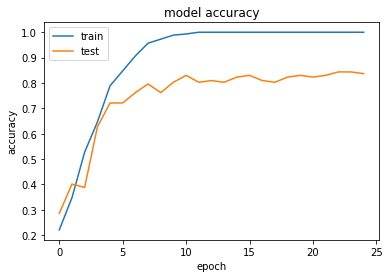

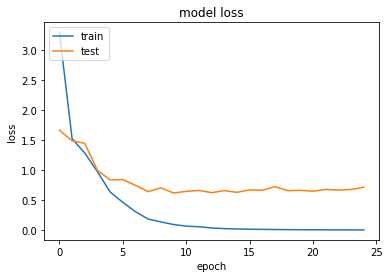

In [92]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.92      0.92      0.92        26
      GMB_04       0.88      0.68      0.77        34
      GMB_06       0.77      0.79      0.78        29
      GMB_08       0.94      0.91      0.92        32
      GMB_10       0.71      0.92      0.80        26

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.85      0.84      0.84       147



In [94]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [95]:
import cv2
import matplotlib.pyplot as plt
image1='daun_test.jpg'

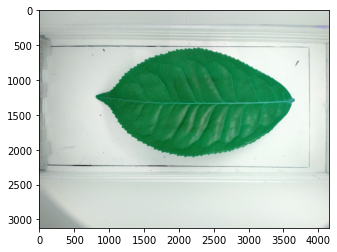

In [96]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [99]:
image_testing = Image.open('daun_test.jpg')
image_testing = np.array(image_testing.resize((256, 256))) / 255.0
image_testing.shape

(256, 256, 3)

In [100]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)
